# Introduction

Ok, this is getting pretty far afield, but as I hit a wall interpreting the setup of LSTM in TF for modeling the MSFT stock price data from Siraj's challenge, I saw [posts](http://bigtheta.io/2017/04/06/notes-on-lstms-in-finance.html) online that suggested that Keras is a simpler interface for getting such a model up and running.  This led me to [this page](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) on using Keras for a timeseries ML project.  I tried copying over the bare minimum code and using it in my '`mnist_tb_test`' notebook in this same folder, as below (rather than copying over the error info, I'll just copy the offending code and execute it here):

In [1]:
%%time

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


######################################################################

# This large block is just for importing and formatting the input data

data_dir_pc = r'C:\Users\DMacKellar\Dropbox\Coding\\
Python\Sirajology\20170908_Stock_market_prediction\Data\Hope2017_mod'
data_dir_mac = '/Users/drew/Dropbox/Coding/Python/\
Sirajology/20170908_Stock_market_prediction/Data/Hope2017_mod'

# On PC:
data_dir = data_dir_pc

# On Mac:
# data_dir = data_dir_mac

import pandas as pd
import numpy as np
import os, sys
import tensorflow as tf
import matplotlib.pyplot as plt


with open(os.path.join(os.path.dirname(data_dir), 
                       'msft_techi.csv'), 'r') as f:
    microsoft_stock = pd.read_csv(f)
    microsoft_stock.set_index(microsoft_stock.columns[0],
                                   inplace=True)
    microsoft_stock.index.name = None
    microsoft_stock = microsoft_stock.astype(np.float32)
    
microsoft_stock.head()


# Build new df with relevant predictors, and stock price
# shifted back one day to serve as labels

microsoft_stock2 = microsoft_stock.copy()[['MACD', 'stoch_%K', 'ATR']].join(
    microsoft_stock.copy()['MSFT'].shift(periods=-1))

microsoft_stock2.dropna(inplace=True)
microsoft_stock2.head()


# Rescale (normalize) each predictor individually

from sklearn.preprocessing import StandardScaler

# Annoying detail; have to instantiate a variable
# as an example of StandardScaler; can't call it directly
scaler = StandardScaler()

microsoft_stock2[microsoft_stock2.columns[:-1]] = scaler.fit_transform(
    microsoft_stock2[microsoft_stock2.columns[:-1]])

microsoft_stock2.describe()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    microsoft_stock2[['MACD', 'stoch_%K',  'ATR']], 
    microsoft_stock2['MSFT'], test_size=0.33, random_state=0)

print('X_train.shape: \t{}\nX_test.shape: \t{}'.format(X_train.shape, 
                                                       X_test.shape))
print('X_train.iloc[0, 0].dtype: \t{}\nX_test.iloc[0, 0].dtype: \t{}'\
      .format(X_train.iloc[0,0].dtype, X_test.iloc[0,0].dtype))

######################################################################

# This block is for setting up and fitting a Keras LSTM to the data
look_back = 1

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Using TensorFlow backend.


X_train.shape: 	(1677, 3)
X_test.shape: 	(826, 3)
X_train.iloc[0, 0].dtype: 	float32
X_test.iloc[0, 0].dtype: 	float32


ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (1677, 3)

In [2]:
%%time

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


######################################################################

# This large block is just for importing and formatting the input data

data_dir_pc = r'C:\Users\DMacKellar\Dropbox\Coding\\
Python\Sirajology\20170908_Stock_market_prediction\Data\Hope2017_mod'
data_dir_mac = '/Users/drew/Dropbox/Coding/Python/\
Sirajology/20170908_Stock_market_prediction/Data/Hope2017_mod'

# On PC:
data_dir = data_dir_pc

# On Mac:
# data_dir = data_dir_mac

import pandas as pd
import numpy as np
import os, sys
import tensorflow as tf
import matplotlib.pyplot as plt


with open(os.path.join(os.path.dirname(data_dir), 
                       'msft_techi.csv'), 'r') as f:
    microsoft_stock = pd.read_csv(f)
    microsoft_stock.set_index(microsoft_stock.columns[0],
                                   inplace=True)
    microsoft_stock.index.name = None
    microsoft_stock = microsoft_stock.astype(np.float32)
    
microsoft_stock.head()


# Build new df with relevant predictors, and stock price
# shifted back one day to serve as labels

microsoft_stock2 = microsoft_stock.copy()[['MACD', 'stoch_%K', 'ATR']].join(
    microsoft_stock.copy()['MSFT'].shift(periods=-1))

microsoft_stock2.dropna(inplace=True)
microsoft_stock2.head()


# Rescale (normalize) each predictor individually

from sklearn.preprocessing import StandardScaler

# Annoying detail; have to instantiate a variable
# as an example of StandardScaler; can't call it directly
scaler = StandardScaler()

microsoft_stock2[microsoft_stock2.columns[:-1]] = scaler.fit_transform(
    microsoft_stock2[microsoft_stock2.columns[:-1]])

microsoft_stock2.describe()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    microsoft_stock2[['MACD', 'stoch_%K',  'ATR']], 
    microsoft_stock2['MSFT'], test_size=0.33, random_state=0)

print('X_train.shape: \t{}\nX_test.shape: \t{}'.format(X_train.shape, 
                                                       X_test.shape))
print('X_train.iloc[0, 0].dtype: \t{}\nX_test.iloc[0, 0].dtype: \t{}'\
      .format(X_train.iloc[0,0].dtype, X_test.iloc[0,0].dtype))

######################################################################

# reshape input to be 3D [samples, timesteps, features]
X_train_3D = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_3D = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# This block is for setting up and fitting a Keras LSTM to the data
look_back = 1

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_3D.shape[1], X_train_3D.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_3D, y_train, epochs=30, batch_size=1, verbose=2)

X_train.shape: 	(1677, 3)
X_test.shape: 	(826, 3)
X_train.iloc[0, 0].dtype: 	float32
X_test.iloc[0, 0].dtype: 	float32
Epoch 1/30
4s - loss: 695.7573
Epoch 2/30
3s - loss: 157.6929
Epoch 3/30
3s - loss: 155.4376
Epoch 4/30
3s - loss: 154.4411
Epoch 5/30
3s - loss: 153.2577
Epoch 6/30
4s - loss: 152.3189
Epoch 7/30
4s - loss: 151.9054
Epoch 8/30
3s - loss: 151.5850
Epoch 9/30
3s - loss: 150.9873
Epoch 10/30
4s - loss: 150.7482
Epoch 11/30
4s - loss: 150.4594
Epoch 12/30
4s - loss: 150.4091
Epoch 13/30
4s - loss: 150.0519
Epoch 14/30
4s - loss: 149.6330
Epoch 15/30
4s - loss: 149.0193
Epoch 16/30
3s - loss: 149.5149
Epoch 17/30
4s - loss: 149.0239
Epoch 18/30
4s - loss: 149.0281
Epoch 19/30
3s - loss: 148.7692
Epoch 20/30
3s - loss: 148.6276
Epoch 21/30
3s - loss: 148.4647
Epoch 22/30
3s - loss: 148.3818
Epoch 23/30
3s - loss: 147.8199
Epoch 24/30
3s - loss: 148.1298
Epoch 25/30
3s - loss: 147.2994
Epoch 26/30
3s - loss: 147.6723
Epoch 27/30
3s - loss: 147.5284
Epoch 28/30
3s - loss: 147

As indicated, the model wants input training data with three dimensions, as indicated in [the article](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) that I cited:

    "The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

    Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:"
    
Of course, the article doesn't show the guts of this transformation, and it's hard to get the gist of how it's functioning from the webpage, so I decided to copy over the dataset and code the author is using in his example, and execute it here.

---

Actually, before getting into the original page cited, I noticed the author's specification at the top of the page that the example was dated, and people should check out one of the other examples he put together.  It seemed that the relevant alternative was [a multivariate LSTM model](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/).  

By consulting this page, I was able to view another training data reshape function, which allowed me to see that essentially all they wanted was to insert a dummy middle dimension with a constant value (1), since X_train was otherwise already in the shape (n_samples/rows, n_features).  Then running the cell just led to a single complaint about the expected value of the final dimension of the input data, which made me realize that the code from the author's first page was not for multivariate data, but expected a single predictor.  So I made one more modification to the above cell, replacing the 'model.add' line with:

    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    
After that, the cell did indeed run, training 100 epochs in just over 5min on the PC, ending with a loss of ~138, although it didn't improve much after the first ~20 epochs (it had dropped from a loss of 700 to 150 within the first two epochs).

Next, I'll copy over the author's code to evaluate the model on the test data:

In [3]:
from sklearn.metrics import mean_squared_error

# X_test2 = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# make a prediction
yhat = model.predict(X_test_3D)

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test.values[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
y_test_2D = y_test.values.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test_2D, X_test.values[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.768


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    microsoft_stock2[['MACD', 'stoch_%K',  'ATR']], 
    microsoft_stock2['MSFT'], test_size=0.33, random_state=0)

In [5]:
y_test.head()

2010-02-17    28.969000
2015-07-13    45.619999
2015-05-06    46.700001
2016-07-19    55.910000
2009-06-03    21.830000
Name: MSFT, dtype: float32

Ok, to a first approximation, we're getting the price of these stocks off by about 20-25%, which is significantly better than random.  I suppose the real test would be whether the direction of change per timepoint would be consistent with the data; i.e., would the model recommend buying/selling at the right time?

This isn't bad as a first pass.  I got the model to fit and predict.  Now I need to spend a little more time understanding the options/assumptions of modeling with Keras, but it's significantly faster to get running than TF.

In [6]:
print(inv_y.shape, inv_yhat.shape)

(826,) (826,)


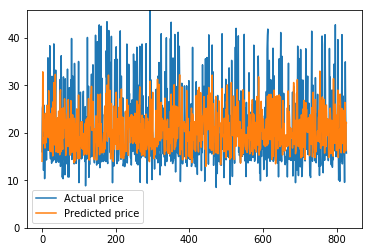

In [7]:
import matplotlib.pyplot as plt


pltx = np.linspace(0, inv_y.shape[0], inv_y.shape[0])
plt.plot(pltx, inv_y, label='Actual price')
plt.plot(pltx, inv_yhat, label='Predicted price')
plt.ylim(0, max(inv_y))
plt.legend()
plt.show()

In [8]:
predictions = X_test.copy()
predictions['Actual'] = y_test
predictions['Predicted'] = inv_yhat
predictions.head()
# print(X_test.shape, y_test.shape, inv_yhat.shape)
# X_test.head()

,MACD,stoch_%K,ATR,Actual,Predicted
2010-02-17,-1.113131,0.125184,-0.915818,28.969000,14.015049
2015-07-13,-0.990267,0.644095,0.537565,45.619999,19.392229
2015-05-06,2.664749,0.165816,2.052358,46.700001,32.855759
2016-07-19,1.037414,0.520638,0.578505,55.910000,28.596420
2009-06-03,0.676522,1.231842,-0.567825,21.830000,20.508825


Oops, but I just realized that using the default SKLearn `train_test_split` function probably isn't the best idea for time series data.  There's an alternate function, [sklearn.model_selection.TimeSeriesSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html), which seems like [a more suitable approach](http://scikit-learn.org/stable/modules/cross_validation.html#timeseries-cv).

There's also some discussion on the topic [here](https://stats.stackexchange.com/questions/117350/how-to-split-dataset-for-time-series-prediction).

Actually, for a first pass, I'll just withold the last third of the timepoints for the test set.

In [9]:
%%time

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


######################################################################

# This large block is just for importing and formatting the input data

data_dir_pc = r'C:\Users\DMacKellar\Dropbox\Coding\\
Python\Sirajology\20170908_Stock_market_prediction\Data\Hope2017_mod'
data_dir_mac = '/Users/drew/Dropbox/Coding/Python/\
Sirajology/20170908_Stock_market_prediction/Data/Hope2017_mod'

# On PC:
data_dir = data_dir_pc

# On Mac:
# data_dir = data_dir_mac

import pandas as pd
import numpy as np
import os, sys
import tensorflow as tf
import matplotlib.pyplot as plt


with open(os.path.join(os.path.dirname(data_dir), 
                       'msft_techi.csv'), 'r') as f:
    microsoft_stock = pd.read_csv(f)
    microsoft_stock.set_index(microsoft_stock.columns[0],
                                   inplace=True)
    microsoft_stock.index.name = None
    microsoft_stock = microsoft_stock.astype(np.float32)
    
microsoft_stock.head()


# Build new df with relevant predictors, and stock price
# shifted back one day to serve as labels

microsoft_stock2 = microsoft_stock.copy()[['MACD', 'stoch_%K', 'ATR']].join(
    microsoft_stock.copy()['MSFT'].shift(periods=-1))

microsoft_stock2.dropna(inplace=True)
microsoft_stock2.head()


# Rescale (normalize) each predictor individually

from sklearn.preprocessing import StandardScaler

# Annoying detail; have to instantiate a variable
# as an example of StandardScaler; can't call it directly
scaler = StandardScaler()

microsoft_stock2[microsoft_stock2.columns[:-1]] = scaler.fit_transform(
    microsoft_stock2[microsoft_stock2.columns[:-1]])

microsoft_stock2.describe()


# from sklearn.model_selection import TimeSeriesSplit
# splitter = TimeSeriesSplit(n_splits=3)

first_two_thirds = 2 * microsoft_stock2.shape[0] // 3
last_third = microsoft_stock2.shape[0] - first_two_thirds
X_train = microsoft_stock2[['MACD', 'stoch_%K', 'ATR']][:first_two_thirds]
X_test = microsoft_stock2[['MACD', 'stoch_%K', 'ATR']][last_third:]
y_train = microsoft_stock2['MSFT'][:first_two_thirds]
y_test = microsoft_stock2['MSFT'][last_third:]

print('X_train.shape: \t{}\nX_test.shape: \t{}'.format(X_train.shape, 
                                                       X_test.shape))
print('X_train.iloc[0, 0].dtype: \t{}\nX_test.iloc[0, 0].dtype: \t{}'\
      .format(X_train.iloc[0,0].dtype, X_test.iloc[0,0].dtype))

######################################################################

# reshape input to be 3D [samples, timesteps, features]
X_train_3D = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_3D = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# This block is for setting up and fitting a Keras LSTM to the data
look_back = 1

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_3D.shape[1], X_train_3D.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_3D, y_train, epochs=10, batch_size=1, verbose=2)

X_train.shape: 	(1668, 3)
X_test.shape: 	(1668, 3)
X_train.iloc[0, 0].dtype: 	float32
X_test.iloc[0, 0].dtype: 	float32
Epoch 1/10
4s - loss: 275.4289
Epoch 2/10
3s - loss: 26.4549
Epoch 3/10
3s - loss: 24.0467
Epoch 4/10
3s - loss: 23.9445
Epoch 5/10
3s - loss: 23.7765
Epoch 6/10
3s - loss: 23.6516
Epoch 7/10
3s - loss: 23.5976
Epoch 8/10
3s - loss: 23.6606
Epoch 9/10
3s - loss: 23.6672
Epoch 10/10
3s - loss: 23.6044
Wall time: 38.8 s


In [10]:
from sklearn.metrics import mean_squared_error

# X_test2 = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# make a prediction
yhat = model.predict(X_test_3D)

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test.values[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
y_test_2D = y_test.values.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test_2D, X_test.values[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 10.561


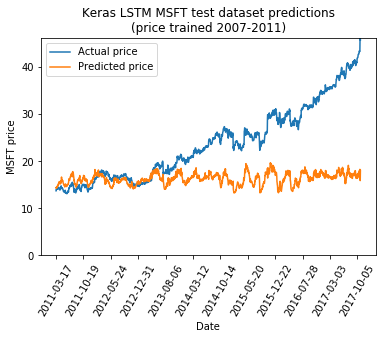

In [11]:
import matplotlib.pyplot as plt


pltx = np.linspace(0, inv_y.shape[0], inv_y.shape[0])
plt.plot(pltx, inv_y, label='Actual price')
plt.plot(pltx, inv_yhat, label='Predicted price')
plt.ylim(0, max(inv_y))
plt.xticks(pltx[::150], X_test.index[::150], rotation=60)
plt.title('Keras LSTM MSFT test dataset predictions\
\n(price trained 2007-2011)')
plt.xlabel('Date')
plt.ylabel('MSFT price')
plt.legend()
plt.show()

Ok, that's much more interesting.  The loss with each training epoch was about an order of magnitude lower, probably reflecting the way that retaining temporal info makes sense given the data and the model, and the fact that the previous `train_test_split` approach basically randomized the order, discarding that information.  Also, the loss doesn't really decrease much after the first 2-3 epochs; this may indicate that the hyperparameters need tweaking.

The other thing that's interesting is that the model predicts no upwards trend in price over the test period, whereas the historical data do.  Let's check the entire dataset again real quick and visualize the overall trends.

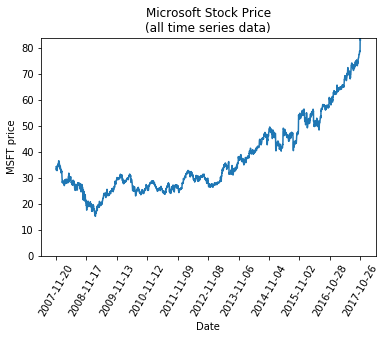

In [12]:
import matplotlib.pyplot as plt


pltx = np.linspace(0, 
                   microsoft_stock2['MSFT'].shape[0], 
                   microsoft_stock2['MSFT'].shape[0])
plt.plot(pltx, microsoft_stock2['MSFT'].values, label='Actual price')
plt.ylim(0, microsoft_stock2['MSFT'].max())
plt.xticks(pltx[::250], microsoft_stock2.index[::250], rotation=60)

plt.title('Microsoft Stock Price\n(all time series data)')
plt.xlabel('Date')
plt.ylabel('MSFT price')

plt.show()

Ok, that's sensible.  The price has nearly doubled since 2013; partitioning the data around mid-2011 won't capture that.  I wonder what the consensus is on how to handle such situations.  Actually, it might, if the previous predictors had also shown commensurate upswings just prior to any increase in price.

It's hard to visualize in the same plot, since I haven't normalized the price data; I'll do that first.

In [13]:
microsoft_stock2['MSFT_scaled'] = scaler.fit_transform(
    microsoft_stock2['MSFT'].values.reshape(-1, 1))

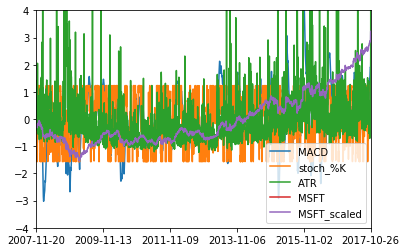

In [14]:
# microsoft_stock2.iloc[:, :3].plot()
microsoft_stock2.plot()
plt.ylim([-4, 4])
plt.show()

And, as that's a little too busy to interpret, I'll try smoothing the data.  The general approach shown of applying [`ewm`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html) from Siraj's notebook seems applicable (I'm not sure if it makes sense to smooth data that are already normalized, however):

In [15]:
msft_smoothed = microsoft_stock2.copy()
msft_smoothed = msft_smoothed.ewm(span=60).mean()

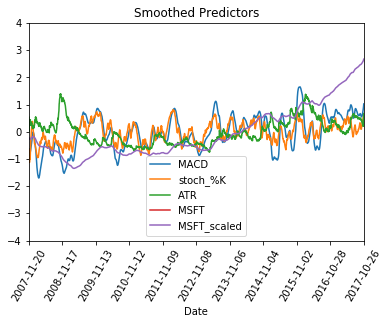

In [16]:
msft_smoothed.plot()
plt.ylim([-4, 4])
plt.xticks(pltx[::250], microsoft_stock2.index[::250], rotation=60)

plt.title('Smoothed Predictors')
plt.xlabel('Date')

plt.show()

Ok, so none of these predictors correlates particularly well with the general long-term trend of increasing stock price toward the end of the period surveyed:

In [17]:
microsoft_stock.head()
microsoft_stock.corr(min_periods=100).iloc[0].sort_values(ascending=False)

MSFT        1.000000
ewm_9       0.998790
ewm_12      0.998355
ewm_26      0.996491
signal      0.393607
MACD        0.380538
ATR         0.238196
stoch_%K    0.162107
Name: MSFT, dtype: float64

Let's try some of the other predictors I'd compiled in the notebook:

    C:\Users\DMacKellar\Dropbox\Coding\Python\Sirajology\20170908_Stock_market_prediction\Stock_predictor.ipynb
    
First, Google Trends data compiled daily for a 10 year period:

In [18]:
import os

MSFT_csv_path_mac = '/Users/drew/Dropbox/Coding/Python/Sirajology/\
20170908_Stock_market_prediction/MSFT.csv'
MSFT_csv_path_pc = r'C:\Users\DMacKellar\Dropbox\Coding\Python\Sirajology\\
20170908_Stock_market_prediction\MSFT.csv'


# on Mac:
# MSFT_csv_dir = os.path.dirname(MSFT_csv_path_mac)
# on PC:
MSFT_csv_dir = os.path.dirname(MSFT_csv_path_pc)

# msft10y_path = os.path.join(MSFT_csv_dir, 'msft_10yrs.csv')
# msftnow_path = os.path.join(MSFT_csv_dir, 'msft_recent.csv')

# msft_10 = pd.DataFrame.from_csv(msft10y_path, header=1)
# msftnow = pd.DataFrame.from_csv(msftnow_path, header=1)

# msft_10.head()

# on Mac:
# gt_msft = pd.DataFrame.from_csv(MSFT_csv_path_mac)
# on PC:
gt_msft = pd.DataFrame.from_csv(MSFT_csv_path_pc)

gt_msft.head()

,Volume
Date,
2007-09-16,100.0
2007-09-17,204.0
2007-09-18,182.0
2007-09-19,118.0
2007-09-20,86.0


In [19]:
out_dir_pc = r'C:\Users\DMacKellar\Dropbox\Coding\Python\Sirajology\\
20170908_Stock_market_prediction\Data'

# on PC:
pred_path = os.path.join(out_dir_pc, 'predictors_df')

predictors_df = pd.DataFrame.from_csv(pred_path)
predictors_df.head()

,Fed_rate(%),USD Strength,US Unemployment(%),S&P U.S. Treasury Bond 0-1 Year Index,S&P U.S. Treasury Bond 1-3 Year Index,S&P U.S. Treasury Bond 1-5 Year Index,S&P U.S. Treasury Bond 3-5 Year Index,S&P U.S. Treasury Bond 5-7 Year Index,S&P U.S. Treasury Bond Index,DJIA,NYSE Composite,S&P500,Nasdaq,Gold,Oil,Real Estate,Hedge Funds
2007-11-01,4.59,98.826797,4.7,227.910004,268.390015,284.529999,319.549988,346.059998,312.209991,13567.870117,10022.080078,1508.439941,2794.830078,77.930000,26.709999,69.550003,NaN
2007-11-02,4.28,98.574600,4.7,228.080002,269.100006,285.529999,320.989990,347.589996,313.309998,13595.099609,10052.259766,1509.650024,2810.379883,79.830002,26.750000,68.559998,NaN
2007-11-03,4.28,98.574600,4.7,228.080002,269.100006,285.529999,320.989990,347.589996,313.309998,13595.099609,10052.259766,1509.650024,2810.379883,79.830002,26.750000,68.559998,NaN
2007-11-04,4.28,98.574600,4.7,228.080002,269.100006,285.529999,320.989990,347.589996,313.309998,13595.099609,10052.259766,1509.650024,2810.379883,79.830002,26.750000,68.559998,NaN
2007-11-05,4.29,98.567200,4.7,228.119995,269.019989,285.329987,320.769989,347.290009,313.089996,13543.400391,9958.820312,1502.170044,2795.179932,79.750000,26.490000,67.570000,NaN


In [20]:
predictors_df['Google_trends'] = gt_msft
print(predictors_df.shape)
microsoft_stock.index = pd.to_datetime(microsoft_stock.index,
                                       format='%Y/%m/%d')
predictors_df['MSFT'] = microsoft_stock['MSFT'].copy().astype(np.float32)
predictors_df = predictors_df.astype(np.float32)
# predictors_df.dropna(inplace=True)
# predictors_df = predictors_df.astype(np.float32)
# predictors_df['MSFT'] = predictors_df['MSFT'].round(2)
new_order = list(x for x in predictors_df.columns[:-1])
new_order.insert(0, 'MSFT')
predictors_df = predictors_df.reindex(columns=new_order)
predictors_df.dropna(subset=['MSFT'], inplace=True)
print(predictors_df.shape)
predictors_df.head()

(3637, 18)
(2504, 19)


,MSFT,Fed_rate(%),USD Strength,US Unemployment(%),S&P U.S. Treasury Bond 0-1 Year Index,S&P U.S. Treasury Bond 1-3 Year Index,S&P U.S. Treasury Bond 1-5 Year Index,S&P U.S. Treasury Bond 3-5 Year Index,S&P U.S. Treasury Bond 5-7 Year Index,S&P U.S. Treasury Bond Index,DJIA,NYSE Composite,S&P500,Nasdaq,Gold,Oil,Real Estate,Hedge Funds,Google_trends
2007-11-20,34.580002,4.51,98.819603,4.7,229.000000,271.709991,287.519989,326.040009,353.559998,317.279999,13010.139648,9575.290039,1439.699951,2596.810059,79.470001,27.520000,63.450001,NaN,185.0
2007-11-21,34.230000,4.50,98.887001,4.7,229.139999,272.279999,287.519989,327.350006,354.739990,318.049988,12799.040039,9405.219727,1416.770020,2562.149902,79.360001,27.480000,63.009998,NaN,185.0
2007-11-23,34.110001,4.56,98.761703,4.7,229.130005,272.089996,287.519989,326.940002,354.250000,318.049988,12980.879883,9582.980469,1440.699951,2596.600098,81.250000,27.709999,64.250000,NaN,61.0
2007-11-26,32.970001,4.62,98.667397,4.7,229.300003,272.809998,287.519989,328.959991,357.059998,320.290009,12743.440430,9389.500000,1407.219971,2540.989990,81.300003,27.170000,61.169998,NaN,105.0
2007-11-27,33.060001,4.39,98.927200,4.7,229.220001,272.359985,287.519989,327.950012,355.600006,319.130005,12958.440430,9521.759766,1428.229980,2580.800049,80.099998,26.480000,62.599998,NaN,98.0


Ok, for some reason, the output of the 14th cell of code in the `Stock_predictor` notebook, which contains:

    params = [
        # Microsoft stock
        {
            'q': "MSFT",
            'x': "NASDAQ",
        }
    ]

    period = '10Y'
    microsoft_stock = get_closing_data(params, period)
    
Is outputting a DataFrame with only 2,517 rows right now, whereas 365 * 10 is 3,650.  But whatever; for now this many data will have to do:

In [21]:
predictors_df.corr(min_periods=100).iloc[0].sort_values(ascending=False)

MSFT                                     1.000000
Nasdaq                                   0.954973
S&P500                                   0.939821
DJIA                                     0.937637
NYSE Composite                           0.860962
Real Estate                              0.808724
USD Strength                             0.798898
Hedge Funds                              0.742114
S&P U.S. Treasury Bond 5-7 Year Index    0.732319
S&P U.S. Treasury Bond Index             0.722954
S&P U.S. Treasury Bond 3-5 Year Index    0.718452
S&P U.S. Treasury Bond 1-5 Year Index    0.700338
S&P U.S. Treasury Bond 1-3 Year Index    0.686310
S&P U.S. Treasury Bond 0-1 Year Index    0.655687
Google_trends                            0.239948
Fed_rate(%)                              0.091514
Gold                                    -0.050355
Oil                                     -0.565581
US Unemployment(%)                      -0.786369
Name: MSFT, dtype: float64

In [22]:
predictors_df.head()

,MSFT,Fed_rate(%),USD Strength,US Unemployment(%),S&P U.S. Treasury Bond 0-1 Year Index,S&P U.S. Treasury Bond 1-3 Year Index,S&P U.S. Treasury Bond 1-5 Year Index,S&P U.S. Treasury Bond 3-5 Year Index,S&P U.S. Treasury Bond 5-7 Year Index,S&P U.S. Treasury Bond Index,DJIA,NYSE Composite,S&P500,Nasdaq,Gold,Oil,Real Estate,Hedge Funds,Google_trends
2007-11-20,34.580002,4.51,98.819603,4.7,229.000000,271.709991,287.519989,326.040009,353.559998,317.279999,13010.139648,9575.290039,1439.699951,2596.810059,79.470001,27.520000,63.450001,NaN,185.0
2007-11-21,34.230000,4.50,98.887001,4.7,229.139999,272.279999,287.519989,327.350006,354.739990,318.049988,12799.040039,9405.219727,1416.770020,2562.149902,79.360001,27.480000,63.009998,NaN,185.0
2007-11-23,34.110001,4.56,98.761703,4.7,229.130005,272.089996,287.519989,326.940002,354.250000,318.049988,12980.879883,9582.980469,1440.699951,2596.600098,81.250000,27.709999,64.250000,NaN,61.0
2007-11-26,32.970001,4.62,98.667397,4.7,229.300003,272.809998,287.519989,328.959991,357.059998,320.290009,12743.440430,9389.500000,1407.219971,2540.989990,81.300003,27.170000,61.169998,NaN,105.0
2007-11-27,33.060001,4.39,98.927200,4.7,229.220001,272.359985,287.519989,327.950012,355.600006,319.130005,12958.440430,9521.759766,1428.229980,2580.800049,80.099998,26.480000,62.599998,NaN,98.0


In [23]:
predictors_df2 = predictors_df.copy()
predictors_df2['MSFT'] = predictors_df2.shift(periods=-1)
predictors_df2.dropna(inplace=True)
predictors_df2.head()

,MSFT,Fed_rate(%),USD Strength,US Unemployment(%),S&P U.S. Treasury Bond 0-1 Year Index,S&P U.S. Treasury Bond 1-3 Year Index,S&P U.S. Treasury Bond 1-5 Year Index,S&P U.S. Treasury Bond 3-5 Year Index,S&P U.S. Treasury Bond 5-7 Year Index,S&P U.S. Treasury Bond Index,DJIA,NYSE Composite,S&P500,Nasdaq,Gold,Oil,Real Estate,Hedge Funds,Google_trends
2009-03-25,18.830000,0.17,109.876602,8.7,238.669998,290.570007,316.420013,365.369995,405.940002,351.609985,7749.810059,5127.000000,813.880005,1528.949951,91.980003,6.91,24.580000,25.190001,224.0
2009-03-26,18.129999,0.16,109.969704,8.7,238.710007,290.890015,316.420013,366.359985,407.140015,352.570007,7924.560059,5230.529785,832.859985,1587.000000,91.930000,6.97,25.129999,25.200001,168.0
2009-03-27,17.480000,0.15,110.666100,8.7,238.649994,290.850006,316.420013,366.179993,406.700012,352.429993,7776.180176,5096.640137,815.940002,1545.199951,90.690002,6.45,24.010000,24.969999,156.0
2009-03-30,18.370001,0.16,111.572403,8.7,238.729996,291.170013,316.420013,367.179993,408.209991,353.200012,7522.020020,4899.049805,787.530029,1501.800049,89.980003,6.22,22.700001,24.750000,82.0
2009-03-31,19.309999,0.16,111.228401,8.7,238.729996,291.480011,316.420013,367.950012,409.309998,353.920013,7608.919922,4978.979980,797.869995,1528.589966,90.279999,6.15,24.280001,24.910000,70.0


In [24]:
for col in predictors_df2:
    print(col, predictors_df2[col].isnull().sum(), predictors_df2[col].dtype)

MSFT 0 float32
Fed_rate(%) 0 float32
USD Strength 0 float32
US Unemployment(%) 0 float32
S&P U.S. Treasury Bond 0-1 Year Index 0 float32
S&P U.S. Treasury Bond 1-3 Year Index 0 float32
S&P U.S. Treasury Bond 1-5 Year Index 0 float32
S&P U.S. Treasury Bond 3-5 Year Index 0 float32
S&P U.S. Treasury Bond 5-7 Year Index 0 float32
S&P U.S. Treasury Bond Index 0 float32
DJIA 0 float32
NYSE Composite 0 float32
S&P500 0 float32
Nasdaq 0 float32
Gold 0 float32
Oil 0 float32
Real Estate 0 float32
Hedge Funds 0 float32
Google_trends 0 float32


In [25]:
%%time

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


######################################################################

# This large block is just for importing and formatting the input data

data_dir_pc = r'C:\Users\DMacKellar\Dropbox\Coding\\
Python\Sirajology\20170908_Stock_market_prediction\Data\Hope2017_mod'
data_dir_mac = '/Users/drew/Dropbox/Coding/Python/\
Sirajology/20170908_Stock_market_prediction/Data/Hope2017_mod'

# On PC:
data_dir = data_dir_pc

# On Mac:
# data_dir = data_dir_mac

import pandas as pd
import numpy as np
import os, sys
import tensorflow as tf
import matplotlib.pyplot as plt


# with open(os.path.join(os.path.dirname(data_dir), 
#                        'msft_techi.csv'), 'r') as f:
#     microsoft_stock = pd.read_csv(f)
#     microsoft_stock.set_index(microsoft_stock.columns[0],
#                                    inplace=True)
#     microsoft_stock.index.name = None
#     microsoft_stock = microsoft_stock.astype(np.float32)
    
# microsoft_stock.head()


# Build new df with relevant predictors, and stock price
# shifted back one day to serve as labels

predictors_df2 = predictors_df.copy()
predictors_df2['MSFT'] = predictors_df2.shift(periods=-1)

predictors_df2.dropna(inplace=True)


# Rescale (normalize) each predictor individually

from sklearn.preprocessing import StandardScaler

# Annoying detail; have to instantiate a variable
# as an example of StandardScaler; can't call it directly
scaler = StandardScaler()
predictors_df3 = predictors_df2.copy()
predictors_df3[predictors_df3.columns] = scaler.fit_transform(
    predictors_df3[predictors_df3.columns])

# predictors_df2.columns = scaler.fit_transform(predictors_df2)


# from sklearn.model_selection import TimeSeriesSplit
# splitter = TimeSeriesSplit(n_splits=3)

first_two_thirds = 2 * predictors_df3.shape[0] // 3
last_third = predictors_df3.shape[0] - first_two_thirds
X_train = predictors_df3.iloc[:first_two_thirds, 1:]
X_test = predictors_df3.iloc[last_third:, 1:]
y_train = predictors_df3['MSFT'][:first_two_thirds]
y_test = predictors_df3['MSFT'][last_third:]

print('X_train.shape: \t{}\nX_test.shape: \t{}'.format(X_train.shape, 
                                                       X_test.shape))
print('X_train.iloc[0, 0].dtype: \t{}\nX_test.iloc[0, 0].dtype: \t{}'\
      .format(X_train.iloc[0,0].dtype, X_test.iloc[0,0].dtype))

######################################################################

# reshape input to be 3D [samples, timesteps, features]
X_train_3D = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_3D = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# This block is for setting up and fitting a Keras LSTM to the data
look_back = 1

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_3D.shape[1], X_train_3D.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_3D, y_train, epochs=10, batch_size=1, verbose=2)

X_train.shape: 	(1394, 18)
X_test.shape: 	(1394, 18)
X_train.iloc[0, 0].dtype: 	float64
X_test.iloc[0, 0].dtype: 	float64
Epoch 1/10
4s - loss: 0.0297
Epoch 2/10
3s - loss: 0.0130
Epoch 3/10
2s - loss: 0.0104
Epoch 4/10
2s - loss: 0.0095
Epoch 5/10
2s - loss: 0.0082
Epoch 6/10
2s - loss: 0.0076
Epoch 7/10
2s - loss: 0.0071
Epoch 8/10
2s - loss: 0.0066
Epoch 9/10
2s - loss: 0.0062
Epoch 10/10
2s - loss: 0.0061
Wall time: 31.2 s


In [27]:
X_test.head()

,Fed_rate(%),USD Strength,US Unemployment(%),S&P U.S. Treasury Bond 0-1 Year Index,S&P U.S. Treasury Bond 1-3 Year Index,S&P U.S. Treasury Bond 1-5 Year Index,S&P U.S. Treasury Bond 3-5 Year Index,S&P U.S. Treasury Bond 5-7 Year Index,S&P U.S. Treasury Bond Index,DJIA,NYSE Composite,S&P500,Nasdaq,Gold,Oil,Real Estate,Hedge Funds,Google_trends
2012-01-27,-0.572034,-0.933774,0.600273,-0.211683,-0.132485,-0.062680,0.043108,0.064283,0.055304,-0.587771,-0.735808,-0.740664,-0.718266,1.969678,1.475801,-0.317477,-0.678086,-0.521856
2012-01-30,-0.572034,-0.910457,0.600273,-0.230572,-0.129576,-0.062680,0.051426,0.081681,0.083793,-0.589681,-0.760555,-0.748061,-0.721883,1.925013,1.484372,-0.348015,-0.668193,-0.497721
2012-01-31,-0.488718,-0.905477,0.600273,-0.235291,-0.131028,-0.062680,0.066397,0.107658,0.116166,-0.595578,-0.758168,-0.749397,-0.720392,1.985834,1.467230,-0.329426,-0.642109,-0.439795
2012-02-01,-0.488718,-0.951435,0.600273,-0.235291,-0.136852,-0.002739,0.056833,0.089033,0.088541,-0.571903,-0.703648,-0.723376,-0.693378,1.997713,1.431519,-0.287603,-0.534183,-0.396351
2012-02-02,-0.488718,-0.977350,0.600273,-0.240010,-0.138309,-0.000309,0.061823,0.100306,0.091994,-0.575034,-0.695450,-0.720145,-0.684426,2.068512,1.365810,-0.278308,-0.471226,-0.420487


In [29]:
from sklearn.metrics import mean_squared_error

# X_test2 = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# make a prediction
yhat = model.predict(X_test_3D)

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test.values), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
y_test_2D = y_test.values.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test_2D, X_test.values), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.356


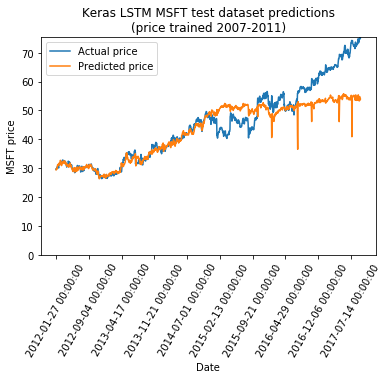

In [30]:
import matplotlib.pyplot as plt


pltx = np.linspace(0, inv_y.shape[0], inv_y.shape[0])
plt.plot(pltx, inv_y, label='Actual price')
plt.plot(pltx, inv_yhat, label='Predicted price')
plt.ylim(0, max(inv_y))
plt.xticks(pltx[::150], X_test.index[::150], rotation=60)
plt.title('Keras LSTM MSFT test dataset predictions\
\n(price trained 2007-2011)')
plt.xlabel('Date')
plt.ylabel('MSFT price')
plt.legend()
plt.show()

So it is also the case that, using the other predictors I had chosen to associate with the MSFT price, I couldn't capture the increase in its performance after 2014.  Perhaps something more stock-specific, like sentiment analysis of headlines related to it, would help.  More likely, another stock would be better predicted using this approach.

In [ ]:
for col in predictors_df:
    print(col, predictors_df[col].isnull().sum())
    
print(predictors_df.shape)

In [ ]:
type(predictors_df['MSFT'][0])
microsoft_stock['MSFT'].isnull().sum()
microsoft_stock['MSFT'].describe()

In [ ]:
print(type(microsoft_stock['MSFT'].index[0]))
microsoft_stock.index = pd.to_datetime(microsoft_stock.index,
                                       format='%Y/%m/%d')
print(type(microsoft_stock['MSFT'].index[0]))
print(type(predictors_df.index[0]))
microsoft_stock.head()
predictors_df.head()
# print(microsoft_stock[0].index == predictors_df[0].index)

In [ ]:
# print(predictors_df.columns[-1], (x for x in predictors_df.columns[:-1]))
new_order = list(x for x in predictors_df.columns[:-1])
new_order.insert(0, 'MSFT')
new_order

In [ ]:
microsoft_stock.head()
# dir(microsoft_stock.loc['2007-11-19'])
microsoft_stock.loc['2007-11-20'].name